## Vendo retorno ibovespa periodo 10 anos(2010-2020)

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Retorno Acumulado IBOV: 0.75')

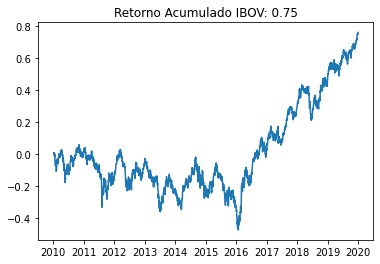

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date
import yfinance as yf


df_stock = yf.download('^BVSP',start='2010-01-01',end='2020-01-01')
#print(df_stock)
df_stock['Close(-1)'] = df_stock['Close'].shift()
df_stock['Retorno'] = (df_stock['Close']/df_stock['Close(-1)'] - 1)
df_stock['Retorno Acumulado'] = df_stock['Retorno'].cumsum()
retorno_ibovespa = df_stock['Retorno Acumulado'].head(-1)[-1]
plt.plot(df_stock['Retorno Acumulado'])
plt.title('Retorno Acumulado IBOV: ' + (round(retorno_ibovespa,2)).astype('str'))


## Modelo Utilizando BB

[*********************100%***********************]  1 of 1 completed
Relatório 
 Anos: 10 
 Rendimento total 0.19979385211864575 
 Rendimento Average 0.009989692605932288


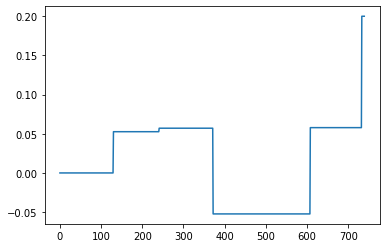

In [9]:
import datetime as date
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as fplt
#Não consegui importar
from datetime import date

df = yf.download('^BVSP',start='2010-01-01',end = '2020-01-01')
periodo = 10
window = 20
desvio = 2

df['MAV'] = df['Close'].rolling(window).mean()
df['Desvio'] = df['Close'].rolling(window).std()
#Calculando Desvio Do medium.
df['Banda_Sup'] = df['MAV'] + (df['Desvio']*desvio)
df['Banda_Inf'] = df['MAV'] - (df['Desvio']*desvio)
df = df.loc['2017-01-01':'2022-01-01']
df = df.reset_index()
#Gerando Sinais
#Atribui um valor para todas as linhas da coluna 'Sinal_inf'. 
#Ver qual diferença entre .loc[:,'Sinal_inf] e ['Sinal_inf'] ao criar uma coluna
df.loc[:,'Sinal_Inf'] = np.where(df.loc[:,'Close'] < df.loc[:,'Banda_Inf']
                                     ,df.loc[:,'Close']*0.99
                                     ,np.nan)
df.loc[:,'Sinal_Sup'] = np.where(df.loc[:,'Close'] > df.loc[:,'Banda_Sup']
                                     ,df.loc[:,'Close']*1.01
                                     ,np.nan)
#print(ibov21.loc[:,('Close','Sinal_Inf','Sinal_Sup')])
#Agora que detectamos os sinais iremos ver como seria o retorno se vendessemos na Alta e comprassemos
# na baixa.
#Então se tivermos sinal da BB Inferior iremos Comprar e sinal da BB Superior iremos Vender.
df = df.fillna(0)
df['Compra'] = np.where(df['Sinal_Inf'] > 0,1,0)
df['Venda'] = np.where(df['Sinal_Sup'] > 0,1,0)
#Ver frequencia dos sinais de compra e Venda
#Calculando retorno
aux = 0
for i in range(len(df)):
    if df.loc[i,'Compra'] != 0 and aux == 0:
        comprado = df.loc[i,'Close']
        aux = 1
    elif df.loc[i,'Venda'] != 0 and aux == 1:
        venda_stk = df.loc[i,'Close']
        retorno = venda_stk/comprado - 1
        df.loc[i,'Retorno'] = float(retorno)
        aux = 0
df = df.fillna(0)
df.loc[:,'Retorno_Acumulado'] = df.loc[:,'Retorno'].cumsum()
plt.plot(df['Retorno_Acumulado'])
print('Relatório \n',
     'Anos:',periodo,'\n',
     'Rendimento total',df.loc[len(df)-1,'Retorno_Acumulado'],'\n',
     'Rendimento Average',df.loc[len(df)-1,'Retorno_Acumulado']/window,
     )
df = df.set_index('Date')

import plotly.io as pio
import plotly.graph_objects as go

def bb_plot(ibov21):
    # Plotting
    pio.templates.default = "plotly_dark"
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, 
                             y=df['Banda_Inf'], 
                             name='Lower Band', 
                             line_color='rgba(173,204,255,0.2)'
                            ))
    fig.add_trace(go.Scatter(x=df.index, 
                             y=df['Banda_Sup'], 
                             name='Upper Band', 
                             fill='tonexty', 
                             fillcolor='rgba(173,204,255,0.2)', 
                             line_color='rgba(173,204,255,0.2)'
                            ))
    fig.add_trace(go.Scatter(x=df.index, 
                             y=df['Close'], 
                             name='Close', 
                             line_color='#636EFA'
                            ))
    fig.add_trace(go.Scatter(x=df.index, 
                             y=df['MAV'], 
                             name='SMA', 
                             line_color='#FECB52'
                            ))
    fig.add_trace(go.Scatter(x=df[df['Compra'] > 0]['Sinal_Inf'].index, 
                             y=df[df['Compra'] > 0]['Sinal_Inf'], 
                             name='Buyers', 
                             mode='markers',
                             marker=dict(
                                 color='#00CC96',
                                 size=7,
                                 )
                             ))
    fig.add_trace(go.Scatter(x=df[df['Venda'] > 0]['Sinal_Sup'].index, 
                             y=df[df['Venda'] > 0]['Sinal_Sup'], 
                             name='Sellers', 
                             mode='markers', 
                             marker=dict(
                                 color='#EF553B',
                                 size=7,
                                 )
                             ))
    fig.show()
bb_plot(df)

## Modelo Utilizando MAV
#### seguidor de tendência

[*********************100%***********************]  1 of 1 completed
Relatório 
 Anos: 10 
 Rendimento total 0.6502221998860638 
 Rendimento Average 0.06502221998860638


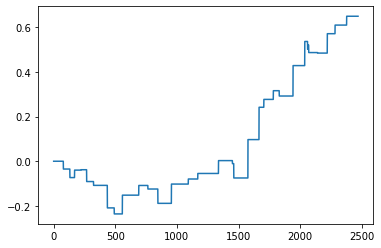

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mplfinance as fplt
from datetime import date
import yfinance as yf
import plotly.io as pio
import plotly.graph_objects as go
#====================================//=========================//===========================================================
#Criando as Medias Moveis ( MAV )
# Iremos cruzar as mav de lp e cp
periodo = 10
df = yf.download('^BVSP',start='2010-01-01',end = '2020-01-01')
df['MAV_CP'] = df['Adj Close'].rolling(14).mean()
df['MAV_LP'] = df['Adj Close'].rolling(45).mean()
# # criando regra de compra e venda
compra = []
venda = []
date = []
aux = 0 #auxiliar para saber se estou comprado ou não
df[['MAV_CP','MAV_LP']] = df[['MAV_CP','MAV_LP']].fillna(0)
df = df.reset_index()
#Compra e Venda:
for i in range(len(df)):
    if df.loc[i,'MAV_CP'] > df.loc[i,'MAV_LP'] and aux == 0 and df.loc[i,'MAV_LP'] != 0: #Tendencia ALta
        compra.append(df.loc[i,'Close'])
        venda.append(np.nan)
        date.append(df.loc[i,'Date'])
        aux = 1 #Comprado
    elif df.loc[i,'MAV_CP'] < df.loc[i,'MAV_LP'] and aux == 1: #Tendencia Baixa
        compra.append(np.nan)
        venda.append(df.loc[i,'Close'])
        date.append(df.loc[i,'Date'])
        aux = 0 
    else:
        compra.append(np.nan)
        venda.append(np.nan)
        date.append(df.loc[i,'Date'])
df_trade = pd.DataFrame({'Date':date,'Compra':compra,'Venda':venda})
df_trade = df_trade.fillna(0)

aux = 0
for i in range(len(df_trade)):
    if df_trade.loc[i,'Compra'] != 0 and aux == 0:
        comprado = df_trade.loc[i,'Compra']
        aux = 1
    elif df_trade.loc[i,'Venda'] != 0 and aux == 1:
        venda_stk = df_trade.loc[i,'Venda']
        retorno = df_trade.loc[i,'Venda']/comprado - 1        
        df_trade.loc[i,'Retorno'] = float(retorno)
        aux = 0
df_trade = df_trade.fillna(0)
df_trade['Retorno_Acumulado'] = df_trade['Retorno'].cumsum()
plt.plot(df_trade['Retorno_Acumulado'])

print('Relatório \n',
     'Anos:',periodo,'\n',
     'Rendimento total',df_trade.iloc[-1,4],'\n',
     'Rendimento Average',df_trade.iloc[-1,4]/periodo
     )
df = df.set_index('Date')
df_trade = df_trade.set_index('Date')
df = pd.merge(df,df_trade,right_index=True,left_index=True)

def mav_plot():
    # Plotting
    pio.templates.default = "plotly_dark"
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[df['MAV_CP'] != 0]['MAV_CP'].index, 
                             y=df[df['MAV_CP'] != 0]['MAV_CP'], 
                             name='MAV_CP',                             
                            ))
    fig.add_trace(go.Scatter(x=df[df['MAV_LP'] != 0]['MAV_LP'].index, 
                             y=df[df['MAV_LP'] != 0]['MAV_LP'], 
                             name='MAV_LP', 
                            ))
    fig.add_trace(go.Scatter(x=df.index, 
                             y=df['Close'], 
                             name='Close', 
                            ))
    fig.add_trace(go.Scatter(x=df[df['Venda'] > 0]['Close'].index, 
                             y=df[df['Venda'] > 0]['Close'], 
                             name='Buyers', 
                             mode='markers',
                             marker=dict(size=7,)
                            ))
    fig.add_trace(go.Scatter(x=df[df['Compra'] > 0]['Close'].index, 
                             y=df[df['Compra'] > 0]['Close'], 
                             name='Sellers', 
                             mode='markers', 
                             marker=dict(size=7,)
                            ))
    fig.show()
mav_plot()